In [ ]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.preprocessing import LabelEncoder

# Load Data
dataku = pd.read_csv('kemiskinan.csv')
dataku.head()

,Provinsi,Penduduk,PendudukN,Kemiskinan,IPM,UsiaProduktif,PLN,Kepadatan,Pengeluaran,PengeluaranN,KatMiskin
0,Aceh,833.91,2.841,15.43,71.99,93.41,99.39,91,1080171,19.527,1
1,Sumatera Utara,1356.72,4.742,9.14,71.77,93.09,97.64,203,1124253,22.539,0
2,Sumatera Barat,364.79,1.135,6.56,72.38,93.12,97.39,132,1235050,30.109,0
3,Riau,491.22,1.595,7.04,72.71,93.68,91.04,73,1340446,37.310,0
4,Jambi,288.10,0.856,7.97,71.29,94.87,95.68,71,1126690,22.706,0


In [ ]:
# Mengetahui apakah ada data yang kosong
print(dataku.isnull().sum())


Provinsi         0
Penduduk         0
PendudukN        0
Kemiskinan       0
IPM              0
UsiaProduktif    0
PLN              0
Kepadatan        0
Pengeluaran      0
PengeluaranN     0
KatMiskin        0
dtype: int64


In [ ]:
# Perhatikan Dulu Kolomnya

print(dataku.columns)

Index(['Provinsi', 'Penduduk', 'PendudukN', 'Kemiskinan', 'IPM',
       'UsiaProduktif', 'PLN', 'Kepadatan', 'Pengeluaran', 'PengeluaranN',
       'KatMiskin'],
      dtype='object')


In [ ]:
import pandas as pd

In [ ]:
# Membuat kolom kategori kemiskinan
def kategori_kemiskinan(kemiskinan):
    if kemiskinan < 10:
        return 'Rendah'
    elif 10 <= kemiskinan <= 20:
        return 'Sedang'
    else:
        return 'Tinggi'

dataku['Kategori_kemiskinan'] = dataku['Kemiskinan'].apply(kategori_kemiskinan)

# Membuat kolom baru (menggunakan nama dataframe yang benar: dataku)
dataku['kategori_kemiskinan'] = dataku['Kemiskinan'].apply(kategori_kemiskinan)
print(dataku)

                      Provinsi  Penduduk  PendudukN  Kemiskinan    IPM  \
0                        Aceh     833.91      2.841       15.43  71.99   
1              Sumatera Utara    1356.72      4.742        9.14  71.77   
2              Sumatera Barat     364.79      1.135        6.56  72.38   
3                        Riau     491.22      1.595        7.04  72.71   
4                       Jambi     288.10      0.856        7.97  71.29   
5            Sumatera Selatan    1119.65      3.880       12.98  70.01   
6                    Bengkulu     306.00      0.921       15.30  71.40   
7                     Lampung    1091.14      3.777       12.76  69.69   
8   Kepulauan Bangka Belitung      72.05      0.070        4.89  71.47   
9              Kepulauan Riau     142.61      0.327        6.13  75.59   
10                DKI Jakarta     496.84      1.615        4.69  80.77   
11                 Jawa Barat    4188.52     15.041        8.43  72.09   
12                Jawa Tengah    4119.

In [ ]:
# Encode kategori menjadi angka
le = LabelEncoder()
dataku['KategorikemiskinanEncoded'] = le.fit_transform(dataku['Kategori_kemiskinan'])

In [ ]:
# Pilih fitur dan label
X = dataku[['Kemiskinan', 'PengeluaranN']]
y = dataku['KategorikemiskinanEncoded']

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[6 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         1

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 1.00


                     Provinsi  Kemiskinan    IPM  Pengeluaran  PengeluaranN  \
0                        Aceh       15.43  71.99      1080171        19.527   
1              Sumatera Utara        9.14  71.77      1124253        22.539   
2              Sumatera Barat        6.56  72.38      1235050        30.109   
3                        Riau        7.04  72.71      1340446        37.310   
4                       Jambi        7.97  71.29      1126690        22.706   
5            Sumatera Selatan       12.98  70.01      1022030        15.555   
6                    Bengkulu       15.30  71.40      1140075        23.620   
7                     Lampung       12.76  69.69       974424        12.302   
8   Kepulauan Bangka Belitung        4.89  71.47      1501844        48.338   
9              Kepulauan Riau        6.13  75.59      1773521        66.899   
10                DKI Jakarta        4.69  80.77      2257991       100.000   
11                 Jawa Barat        8.43  72.09    

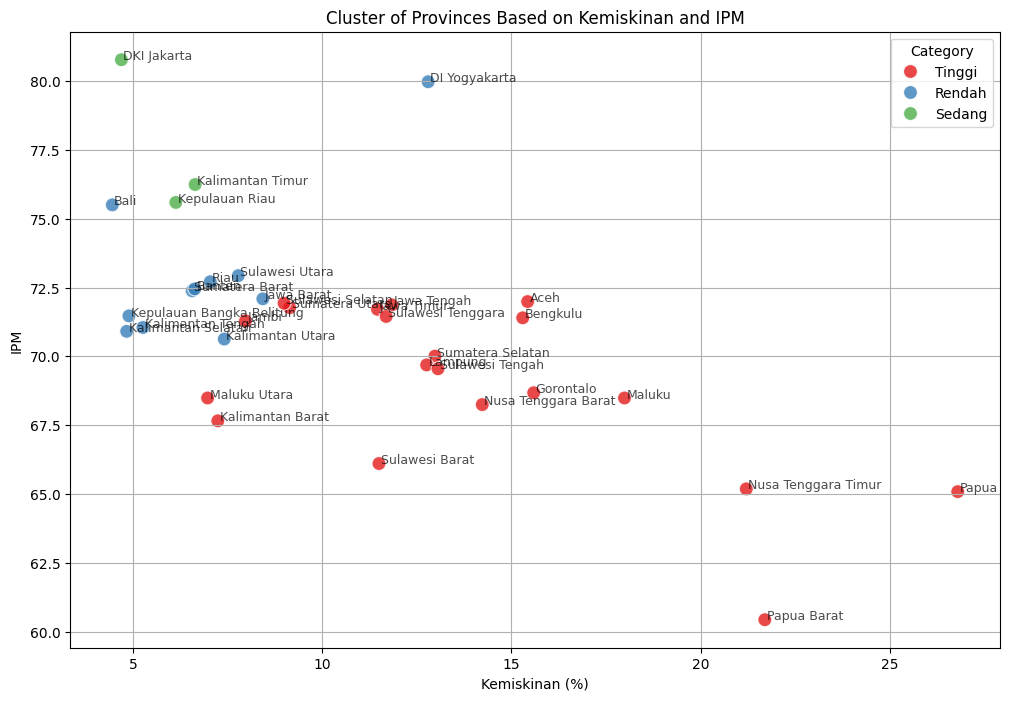

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
data = {
    'Provinsi': ['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 'Sumatera Selatan',
                 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'DKI Jakarta',
                 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur', 'Banten', 'Bali',
                 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Barat', 'Kalimantan Tengah',
                 'Kalimantan Selatan', 'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara',
                 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat',
                 'Maluku', 'Maluku Utara', 'Papua Barat', 'Papua'],
    'Kemiskinan': [15.43, 9.14, 6.56, 7.04, 7.97, 12.98, 15.3, 12.76, 4.89, 6.13, 4.69, 8.43, 11.84, 12.8,
                   11.46, 6.63, 4.45, 14.23, 21.21, 7.24, 5.26, 4.83, 6.64, 7.41, 7.78, 13.06, 8.99, 11.69,
                   15.59, 11.5, 17.99, 6.97, 21.7, 26.8],
    'IPM': [71.99, 71.77, 72.38, 72.71, 71.29, 70.01, 71.4, 69.69, 71.47, 75.59, 80.77, 72.09, 71.87, 79.97,
            71.71, 72.45, 75.5, 68.25, 65.19, 67.66, 71.05, 70.91, 76.24, 70.63, 72.93, 69.55, 71.93, 71.45,
            68.68, 66.11, 68.49, 68.49, 60.44, 65.09],
    'Pengeluaran': [1080171, 1124253, 1235050, 1340446, 1126690, 1022030, 1140075, 974424, 1501844, 1773521,
                    2257991, 1324960, 1018487, 1411972, 1064382, 1517044, 1509666, 1089764, 794361, 1125063,
                    1333318, 1335457, 1754195, 1545689, 1211839, 1035777, 1057864, 1037799, 1068282, 893761,
                    1083921, 1092824, 1395014, 1309714],
    'PengeluaranN': [19.527, 22.539, 30.109, 37.31, 22.706, 15.555, 23.62, 12.302, 48.338, 66.899, 100, 36.252,
                     15.313, 42.197, 18.449, 49.376, 48.872, 20.183, 0, 22.595, 36.823, 36.969, 65.579, 51.333,
                     28.523, 16.494, 18.003, 16.632, 18.715, 6.791, 19.784, 20.392, 41.039, 35.211],
}

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Mengambil kolom fitur untuk analisis
features = ['Kemiskinan', 'IPM', 'Pengeluaran', 'PengeluaranN']

# Convert DataFrame ke array 2D
X = df[features].values

# Normalisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan K-Means Clustering untuk mengelompokkan menjadi 3 kategori
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Menambahkan kategori berdasarkan hasil kluster
df['Category'] = df['Cluster'].map({0: 'Tinggi', 1: 'Sedang', 2: 'Rendah'})

# Menampilkan hasil dengan kategori
print(df[['Provinsi', 'Kemiskinan', 'IPM', 'Pengeluaran', 'PengeluaranN', 'Category']])

# Visualisasi Hasil Clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Kemiskinan'], y=df['IPM'], hue=df['Category'], palette='Set1', s=100, alpha=0.8)

# Menambahkan label provinsi ke grafik
for i in range(df.shape[0]):
    plt.text(df['Kemiskinan'][i] + 0.05, df['IPM'][i], df['Provinsi'][i], fontsize=9, alpha=0.7)

plt.title('Cluster of Provinces Based on Kemiskinan and IPM')
plt.xlabel('Kemiskinan (%)')
plt.ylabel('IPM')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [ ]:
import pickle
# Menyimpan model menjadi file .pkl
with open('ML_Kemiskinan.pkl','wb') as file:
    pickle.dump(model,file)

In [ ]:
# Membuat model dalam file .pkl
with open('ML_Kemiskinan.pkl', 'rb') as file:
    model = pickle.load(file)